In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc')
import plotnine as pn
from pandas import DataFrame

In [2]:
data = pd.read_csv('/Users/senlinlidewo/pyprogram/cctv_news_report/NLP_result_keywords.csv')
data

,Unnamed: 0,score,word,date
0,0,0.541,全国人大,2015-12-24
1,1,0.532,办公厅,2015-12-24
2,2,0.530,政府,2015-12-24
3,3,0.530,匈塞铁路,2015-12-24
4,4,0.527,合作,2015-12-24
...,...,...,...,...
15574,13563,0.527,报告,2021-03-08
15575,13564,0.527,近平,2021-03-08
15576,13565,0.525,国家,2021-03-08
15577,13566,0.525,草案,2021-03-08


In [3]:
data = data.drop('Unnamed: 0',axis=1)

In [4]:
data.columns = ['score','words','reportday']

In [5]:
type(data.reportday[0])

str

In [6]:
from datetime import datetime
data['date'] = data['reportday'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
data.sort_values('date', inplace=True)

In [7]:
data = data.drop('reportday',axis=1)

In [8]:
data.head()


,score,words,date
0,0.541,全国人大,2015-12-24
1,0.532,办公厅,2015-12-24
2,0.530,政府,2015-12-24
3,0.530,匈塞铁路,2015-12-24
4,0.527,合作,2015-12-24


In [9]:
rename = ['习近平主席','习主席','主席','习近平总书记','总书记','习近平']
for i in rename:
    data['words'] = data['words'].apply(lambda x: x.replace(i,'近平'))
data[data.words == '习近平']

,score,words,date


In [10]:
rename_covid = ['确诊病例','病例','疫情防空','疫情','新冠肺炎','抗疫']
for i in rename_covid:
    data['words'] = data['words'].apply(lambda x: x.replace(i,'covid'))
data[data.words == '病例']

,score,words,date


In [11]:
rename_covid = ['扶贫','脱贫']
for i in rename_covid:
    data['words'] = data['words'].apply(lambda x: x.replace(i,'贫困'))
data[data.words == '扶贫']

,score,words,date


In [12]:
data['sum_Times']=data['score'].groupby(data['words']).cumsum()

In [13]:
name = ['近平','李克强','经济','高质量发展','全国人大','贫困','covid']

In [14]:
name = ['近平','李克强','栗战书','汪洋','王沪宁','赵乐际','韩正']
result = DataFrame([], columns=['score','words','date'])
for i in name:
    data_i = data[data.words == i]
    result = result.append(data_i)
display(result)
result.shape

,score,words,date,sum_Times
59,0.526,近平,2015-12-31,0.526
58,0.534,近平,2015-12-31,1.060
69,0.538,近平,2016-01-01,1.598
60,0.525,近平,2016-01-01,2.123
89,0.526,近平,2016-01-03,2.649
...,...,...,...,...
6903,0.532,赵乐际,2018-09-26,1.059
6934,0.523,赵乐际,2018-09-29,1.582
6767,0.525,韩正,2018-09-12,0.525
10881,0.523,韩正,2019-11-11,1.048


(945, 4)

In [10]:
data_total=data

In [15]:
data1 = result

In [49]:
data1 = data[data.sum_Times >10]
pd.set_option('display.max_rows', None)
DataFrame(data1.groupby('words'))

,0,1
0,covid,score words date sum_Times 1197...
1,covidcovid,score words date sum_Times...
2,covid防控,score words date sum_Times 11...
3,上海合作组织,score words date sum_Times 592...
4,世界经济,score words date sum_Times 13790...
5,中国,score words date sum_Times 4011 ...
6,中国特色社会,score words date sum_Times 848...
7,中国经济,score words date sum_Times 11510...
8,中央,score words date sum_Times 8997 ...
9,中方,score words date sum_Times 2998 ...


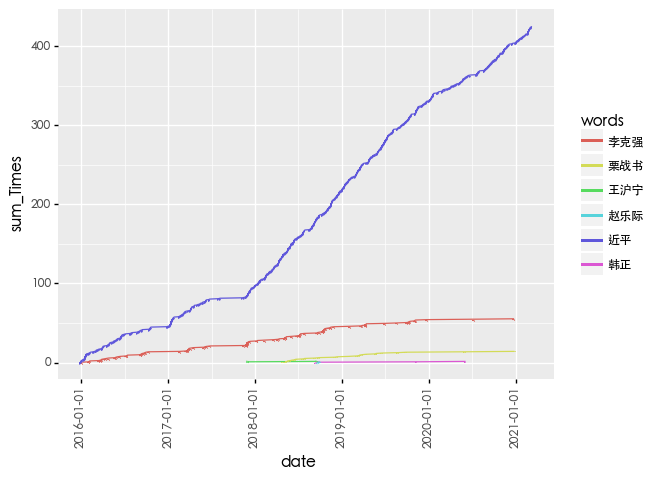

<ggplot: (8767402867035)>

In [21]:
pn.ggplot(data1,pn.aes(x=data1['date'],y=data1['sum_Times'],
                     color = 'words',group='words',label = 'words'))+pn.geom_line()+pn.geom_text(size=1)+pn.theme(axis_text_x = pn.element_text(angle=90))+pn.theme(text=pn.element_text(family='Heiti TC'))


In [ ]:
# 省份

In [17]:
name = ['中国',
 '北京',
 '上海',
 '天津',
 '重庆',
 '河北',
 '山西',
 '河南',
 '辽宁',
 '吉林',
 '黑龙江',
 '内蒙古',
 '江苏',
 '山东',
 '安徽',
 '浙江',
 '福建',
 '钓鱼岛',
 '湖北',
 '湖南',
 '广东',
 '广西',
 '江西',
 '四川',
 '海南',
 '贵州',
 '云南',
 '陕西',
 '甘肃',
 '青海',
 '宁夏',
 '新疆',
 '香港',
 '台湾',
 '澳门',
 '西藏',
 '港澳']

In [30]:
name = ['经济','高质量发展','贫困','covid','创新','发展','改革','畅通','市场活力','企业','行业','产业','区域']

In [49]:
name = ['农产品', '新能源','国货','家电','旅游','文化','体育','家居','人工智能']

In [22]:
result = DataFrame([], columns=['score','words','date'])
for i in name:
    data_i = data[data.words == i]
    result = result.append(data_i)
display(result)
result.shape

,score,words,date,sum_Times
59,0.526,近平,2015-12-31,0.526
58,0.534,近平,2015-12-31,1.060
69,0.538,近平,2016-01-01,1.598
60,0.525,近平,2016-01-01,2.123
89,0.526,近平,2016-01-03,2.649
...,...,...,...,...
6903,0.532,赵乐际,2018-09-26,1.059
6934,0.523,赵乐际,2018-09-29,1.582
6767,0.525,韩正,2018-09-12,0.525
10881,0.523,韩正,2019-11-11,1.048


(945, 4)

plt.plot(x,y)
plt.yticks(fontproperties=font,fontsize=12)

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc')

plt.title("标题￦", fontproperties=font)
plt.show()

history

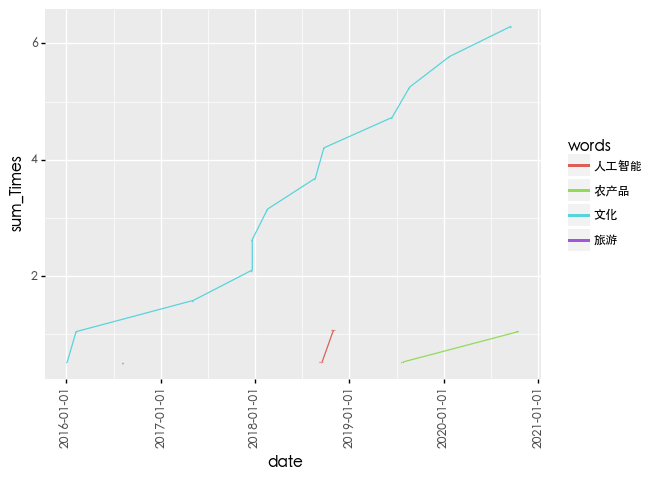

<ggplot: (8769292269629)>

In [52]:
pn.ggplot(result,pn.aes(x=result['date'],y=result['sum_Times'],
                     color = 'words',group='words',label = 'words'))+pn.geom_line()+pn.geom_text(size=1)+pn.theme(axis_text_x = pn.element_text(angle=90))+pn.theme(text=pn.element_text(family='Heiti TC'))
